# HOMEWORK 9

In this homework, you are going to use the dlib face detector and apply it to an image of your liking. You can follow the procedure shown in lesson 9. Please always comment your code so I can see what you're doing :-)

For this homework we are not going to provide you with any code, you'll have to build the face detector on your own.

### Step 0

Run the necessary imports.

In [18]:
import cv2
import dlib
import numpy as np
import random
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 15]

### Step 1

Load an image (any image that contains faces).

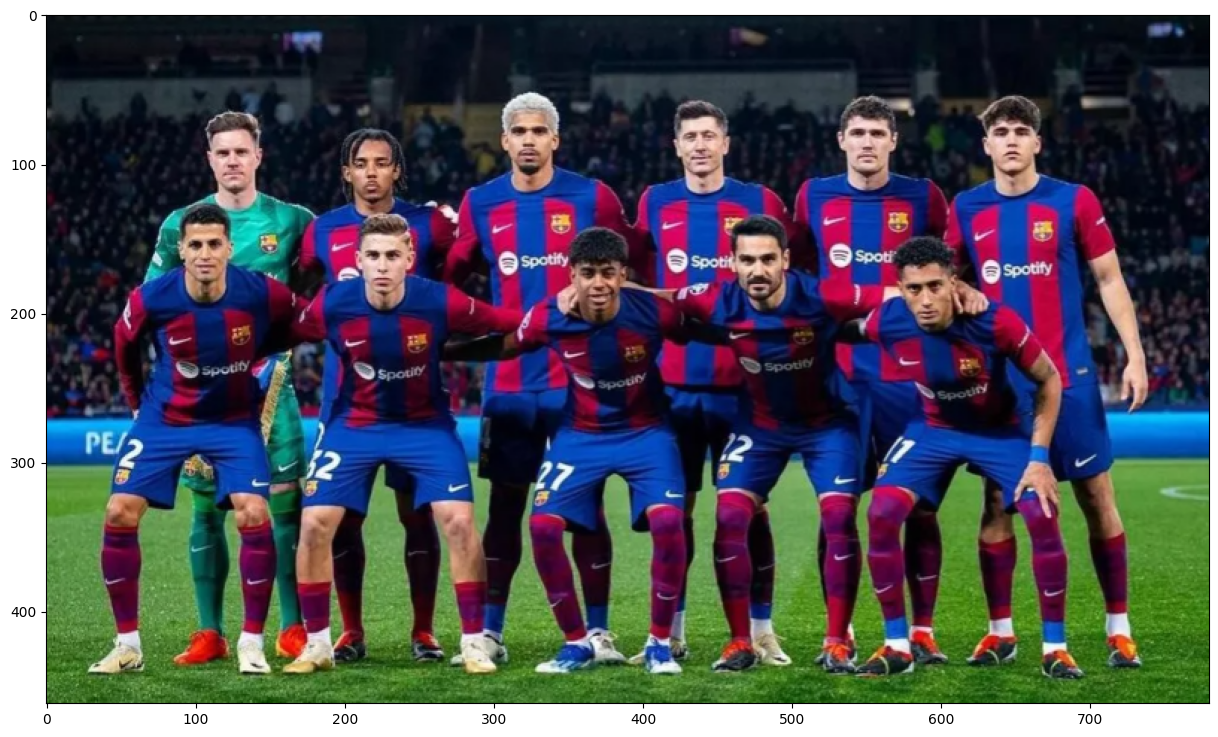

In [3]:
image = cv2.imread('barsa.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

### Step 2

Load the dlib face predictor.

In [4]:
face_detector = dlib.get_frontal_face_detector()

### Step 3
Run the predictor on your image.

In [5]:
faces = face_detector(image, 1)
print(f"Обнаружено {len(faces)} лиц на изображении")

Обнаружено 11 лиц на изображении


### Step 4

Draw bounding boxes around the detected faces and plot the image. Use different colour for each face.

(<Axes: >, <matplotlib.image.AxesImage at 0x716a39ddb4c0>)

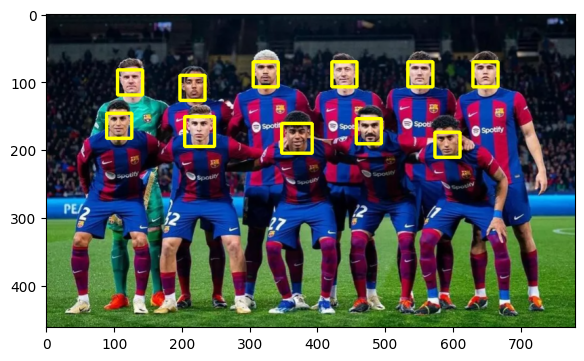

In [6]:
for face in faces:
    x, y, w, h = face.left(), face.top(), face.width(), face.height()
    cv2.rectangle(image, (x, y), (x + w, y + h), (255,255,0), 3)

plt.subplot(121), plt.imshow(image)

### Step 5 (optional)

Repeat the process with a different and more challenging image (more faces, smaller faces, people with glasses, hats, helmets, etc.). How does the detector perform? Is it robust?

In [7]:
face_detector = dlib.get_frontal_face_detector()

def detect_faces(image, color: tuple = None):
    color = color or (255, 255, 0)
    faces = face_detector(image, 1)

    # Draw frames around detected faces
    for face in faces:
        x, y, w, h = face.left(), face.top(), face.width(), face.height()
        cv2.rectangle(image, (x, y), (x + w, y + h), color, 3)
    
    return image, len(faces)

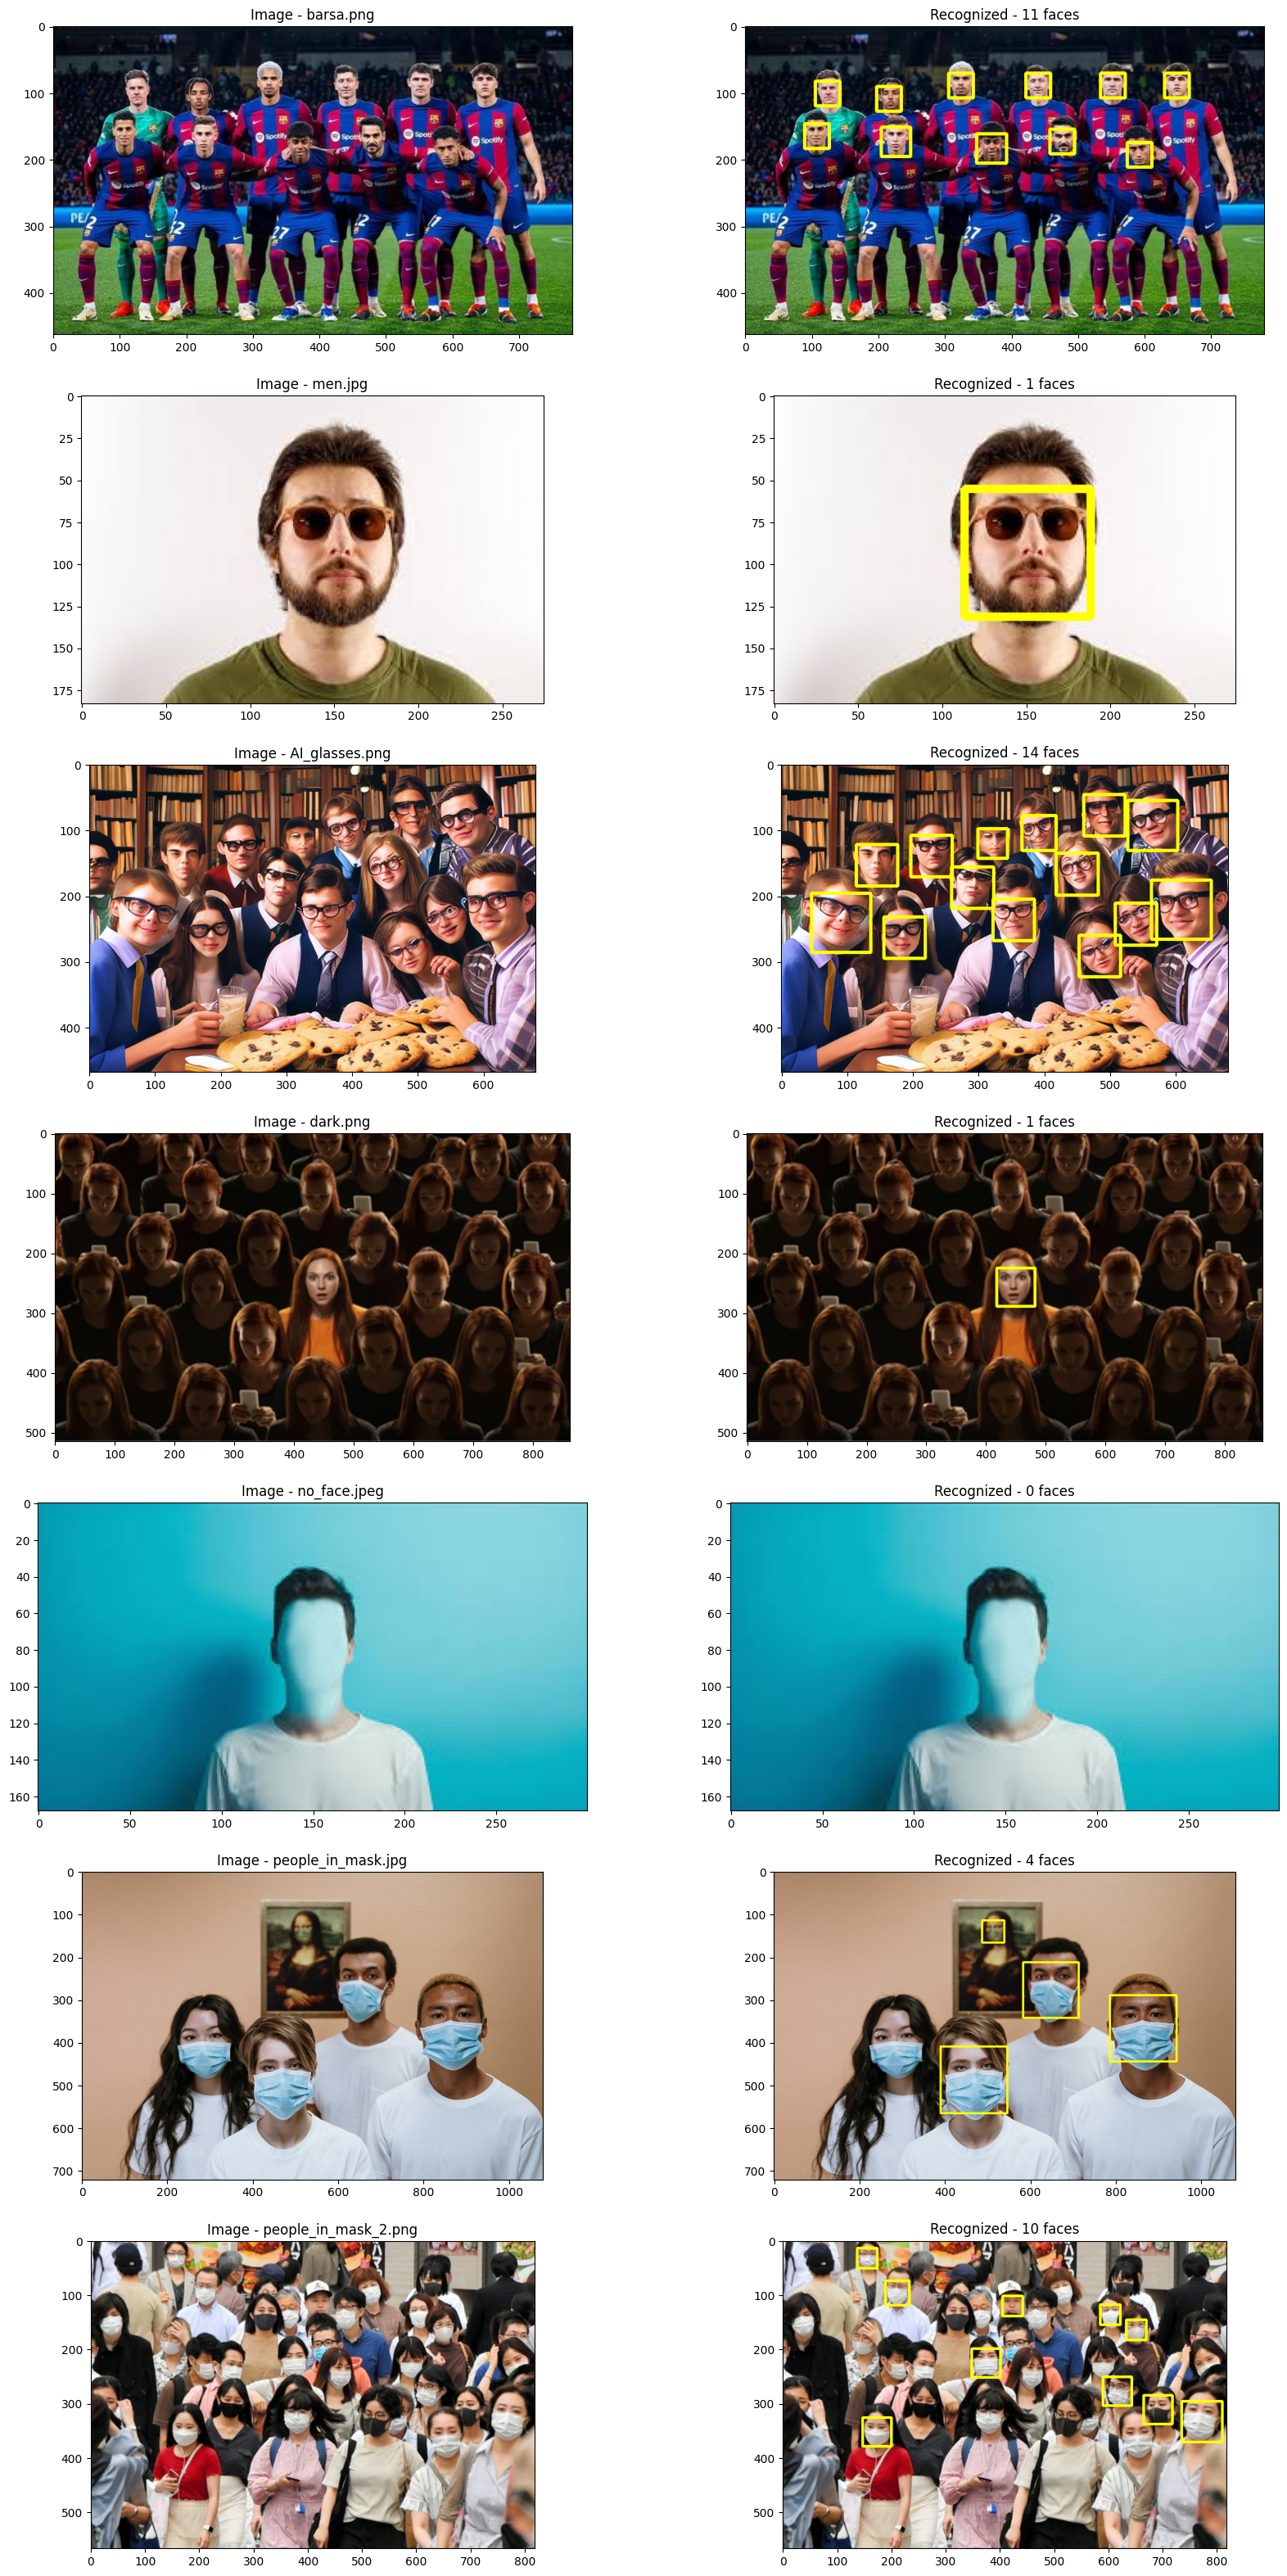

In [32]:
images = ['barsa.png', 'men.jpg', 'AI_glasses.png', 'dark.png', 'no_face.jpeg', 'people_in_mask.jpg', 'people_in_mask_2.png']
plt.figure(0, figsize=(20, 40))
display_rows = len(images)

for i, img_path in enumerate(images):
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_modified, faces_count = detect_faces(image.copy())
    
    ax_1 = plt.subplot2grid((display_rows, 2), (i, 0))
    plt.sca(ax_1), plt.imshow(image), plt.title(f'Image - {img_path}')
    ax_2 = plt.subplot2grid((display_rows, 2), (i, 1))
    plt.sca(ax_2), plt.imshow(image_modified), plt.title(f'Recognized - {faces_count} faces')

### **Анализ работы детектора dlib:**
#### **Простые изображения:** На изображениях, где лица хорошо освещены и явно видны, dlib работает весьма точно.
#### **Сложные изображения:** На изображениях с частично закрытыми лицами (очки, маски), низким освещением, или где лица очень малы, точность dlib может снижаться.